In [1]:
# Forked: https://github.com/baibai25/patoyata-gacha/blob/main/patoyata_gacha.ipynb


In [2]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from collections import Counter
import matplotlib.pyplot as plt
import japanize_matplotlib


In [3]:
df = pd.read_csv("../data/patoyata_gacha/image_list.csv")


In [4]:
file_path_list = []
for f in df["share_url"]:
    path = os.path.join("../data/patoyata_gacha", f)
    file_path_list.append(path)

df["file_path"] = file_path_list
df["NAME"] = df["rare"] + ": " + df["name"]


In [5]:
def get_gacha_result(rare, sample_size, proba, df):
    # 排出確率に従いレア度をガチャ回数分出力
    rare_result = np.random.choice(a=rare, size=sample_size, p=proba)

    # 対象レア度一覧から、ランダムにピックアップ
    rare_count = Counter(rare_result)
    result = pd.DataFrame([], columns=df.columns)
    for rare, count in rare_count.items():
        result = pd.concat(
            [
                result,
                df[df["rare"] == rare]
                .sample(n=count, replace=True)
                .reset_index(drop=True),
            ],
            axis=0,
        )

    return result


In [6]:
def show_result(rare_result):
    images = [Image.open(filename) for filename in rare_result["file_path"].values]
    names = [name for name in rare_result["NAME"].values]

    fig, axes = plt.subplots(2, 5, figsize=(12, 6))

    for i in range(10):
        ax = axes[i // 5, i % 5]
        ax.imshow(images[i])
        ax.axis("off")
        ax.text(0.5, -0.1, names[i], transform=ax.transAxes, fontsize=10, ha="center")

    plt.show()


In [7]:
rare = ["SSR", "SR", "R"]
proba = [0.01, 0.09, 0.90]
gacha_num = 10


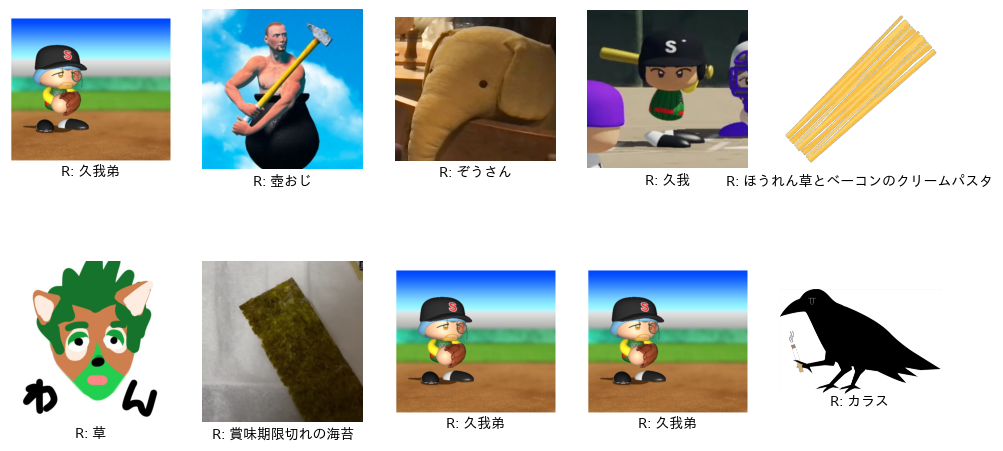

In [8]:
rare_result = get_gacha_result(rare, gacha_num, proba, df)
show_result(rare_result)


In [9]:
df[["name", "rare"]].rename(columns={"name": "キャラ名", "rare": "レア度"})


,キャラ名,レア度
0,Chris,SSR
1,Donnis,SSR
2,大谷遺伝子パト,SSR
3,Vカツ パト,SSR
4,Vカツ ヤタ,SSR
5,Mirrativ パト,SSR
6,Mirrativ ヤタ,SSR
7,パトちゃん,SSR
8,ヤタちゃん,SSR
9,スパプリ,SSR


In [10]:
rare_result


,rare,name,share_url,file_path,NAME
0,R,久我弟,kuga_otouto.png,../data/patoyata_gacha/kuga_otouto.png,R: 久我弟
1,R,壺おじ,tsubo.jpg,../data/patoyata_gacha/tsubo.jpg,R: 壺おじ
2,R,ぞうさん,zou.PNG,../data/patoyata_gacha/zou.PNG,R: ぞうさん
3,R,久我,kuga.PNG,../data/patoyata_gacha/kuga.PNG,R: 久我
4,R,ほうれん草とベーコンのクリームパスタ,pasta_spaghetti.png,../data/patoyata_gacha/pasta_spaghetti.png,R: ほうれん草とベーコンのクリームパスタ
5,R,草,dog.jpg,../data/patoyata_gacha/dog.jpg,R: 草
6,R,賞味期限切れの海苔,nori.PNG,../data/patoyata_gacha/nori.PNG,R: 賞味期限切れの海苔
7,R,久我弟,kuga_otouto.png,../data/patoyata_gacha/kuga_otouto.png,R: 久我弟
8,R,久我弟,kuga_otouto.png,../data/patoyata_gacha/kuga_otouto.png,R: 久我弟
9,R,カラス,crow_tr.png,../data/patoyata_gacha/crow_tr.png,R: カラス


In [11]:
%%writefile app.py

import os
from collections import Counter

import japanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import streamlit as st
import streamlit_nested_layout
from PIL import Image

st.set_option("deprecation.showPyplotGlobalUse", False)


def gacha_config():
    rare = ["SSR", "SR", "R"]
    proba = [0.01, 0.09, 0.90]
    gacha_num = 10

    return rare, proba, gacha_num


def get_gacha_result(rare, sample_size, proba, df):
    # 排出確率に従いレア度をガチャ回数分出力
    rare_result = np.random.choice(a=rare, size=sample_size, p=proba)

    # 対象レア度一覧から、ランダムにピックアップ
    rare_count = Counter(rare_result)
    result = pd.DataFrame([], columns=df.columns)
    for rare, count in rare_count.items():
        result = pd.concat(
            [
                result,
                df[df["レア度"] == rare]
                .sample(n=count, replace=True)
                .reset_index(drop=True),
            ],
            axis=0,
        )

    return result


def show_result(rare_result):
    images = [Image.open(filename) for filename in rare_result["file_path"].values]
    names = [name for name in rare_result["description"].values]

    fig, axes = plt.subplots(2, 5, figsize=(12, 6))

    for i in range(10):
        ax = axes[i // 5, i % 5]
        ax.imshow(images[i])
        ax.axis("off")
        ax.text(0.5, -0.1, names[i], transform=ax.transAxes, fontsize=10, ha="center")

    st.pyplot(plt.show())


# Load Dataset
df = pd.read_csv("../data/patoyata_gacha/image_list.csv")
df.rename(columns={"rare": "レア度", "name": "キャラ名"}, inplace=True)

file_path_list = []
for f in df["share_url"]:
    path = os.path.join("../data/patoyata_gacha", f)
    file_path_list.append(path)

df["file_path"] = file_path_list
df["description"] = df["レア度"] + ": " + df["キャラ名"]

# Side
st.sidebar.title("パトヤタガチャ")
st.sidebar.header("通常ピックアップ")

# 排出一覧を表示
st.sidebar.subheader("排出キャラ一覧")
st.sidebar.caption("SSR: 1%, SR: 9%, SR: 90%")
st.sidebar.dataframe(df[["レア度", "キャラ名"]], hide_index=True)

# Main
if "button_count" not in st.session_state:
    st.session_state["button_count"] = 0

history_df = pd.DataFrame()
if "history_df" not in st.session_state:
    st.session_state["history_df"] = history_df


if st.button("10回引く"):
    # ガチャ実行
    rare, proba, gacha_num = gacha_config()
    rare_result = get_gacha_result(rare, gacha_num, proba, df)
    show_result(rare_result)

    # ボタンが押された回数をカウント
    st.session_state["button_count"] += 10

    # ガチャ履歴を保存
    rare_result = rare_result[["レア度", "キャラ名"]]
    st.session_state["history_df"] = pd.concat(
        [st.session_state["history_df"], rare_result], axis=0
    )

outer_cols = st.columns([1, 1])
with outer_cols[0]:
    st.write(f"{st.session_state['button_count']}連目")

with outer_cols[1]:
    st.write("ガチャ履歴")
    st.dataframe(st.session_state["history_df"], hide_index=True)


Writing app.py
